# Classfication

간단한 data 전처리 과정과 함께<br>
Data를 분류하는데 사용되는 machine learning 기법들을 알아보자.

## import

먼저 필요한 모듈들을 import한다.

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt    
from IPython.display import Image
%matplotlib inline

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #x의 범위를 통해 plot의 범위 설정
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

sklearn의 버전을 체크하는 부분으로 제대로 install되었는지 확인한다.

In [4]:
from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion

if LooseVersion(sklearn_version) < LooseVersion('0.18'):
    raise ValueError('Please use scikit-learn 0.18 or newer')

In [5]:
sklearn_version

'0.18.1'

<br><br>

## wine dataset

In [14]:
import pandas as pd

df_wine = pd.read_csv('~/fintech/data/wine.data', header=None) #각자 알맞은 wine.data 파일 경로 입력

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0) #7:3으로 분할
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) #training set의 parameter를 사용하여 test set의 데이터도 변환.

### Check whether the training set labels are uniformly distributed.

In [17]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:]) # class의 분포가 동일하지 않은 것을 알 수 있다.

Class label distribution: [41 50 33]


##  예제 데이터셋

scikit-learn에서 **Iris 데이터**를 가져온다.<br> 세번째와 네번째 열인 the petal length, the petal width를 feature로 사용하고<br> label에 해당하는 값은 **integer 값**으로 변환해 두었다. labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica

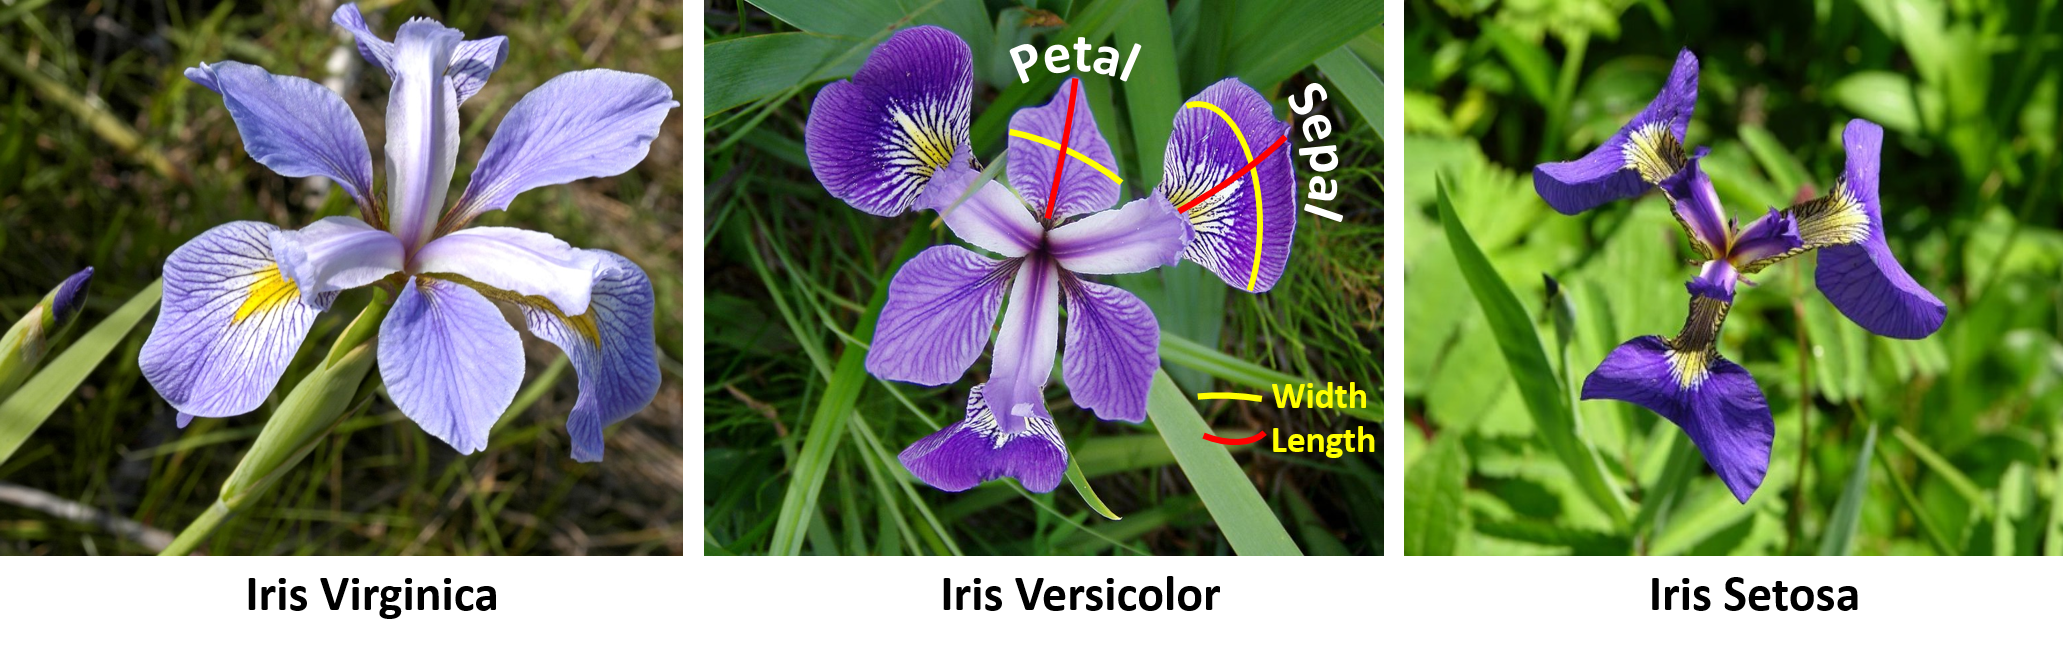

In [5]:
Image(filename='images/Iris_img.png', width=700) 

In [6]:
from sklearn import datasets

iris = datasets.load_iris()

data = iris.data
data.shape # iris.data: (150,4) 2d-array

X = iris.data[:, [2, 3]] # 2, 3번째 feature 만 사용
y = iris.target # iris.target: (150,) array  

print('Class labels:', np.unique(y))

print('Features names:', iris.feature_names)

Class labels: [0 1 2]
Features names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<br>

데이터의 70%를 training에 사용하고 나머지 30%를 test data으로 사용하기 위해 **split**한다.<br>
이때 test_size는 test_set의 비율을 받고
**stratify=y**를 통해 traing과 test data의 **y비율이 같도록** 한다.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


<br>

X_train의 통계값을 이용하여 **정규화**시킴<br>

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(np.mean(X_train_std), np.std(X_train_std))

1.86094526032e-16 1.0


## Support Vector Machines(SVM)

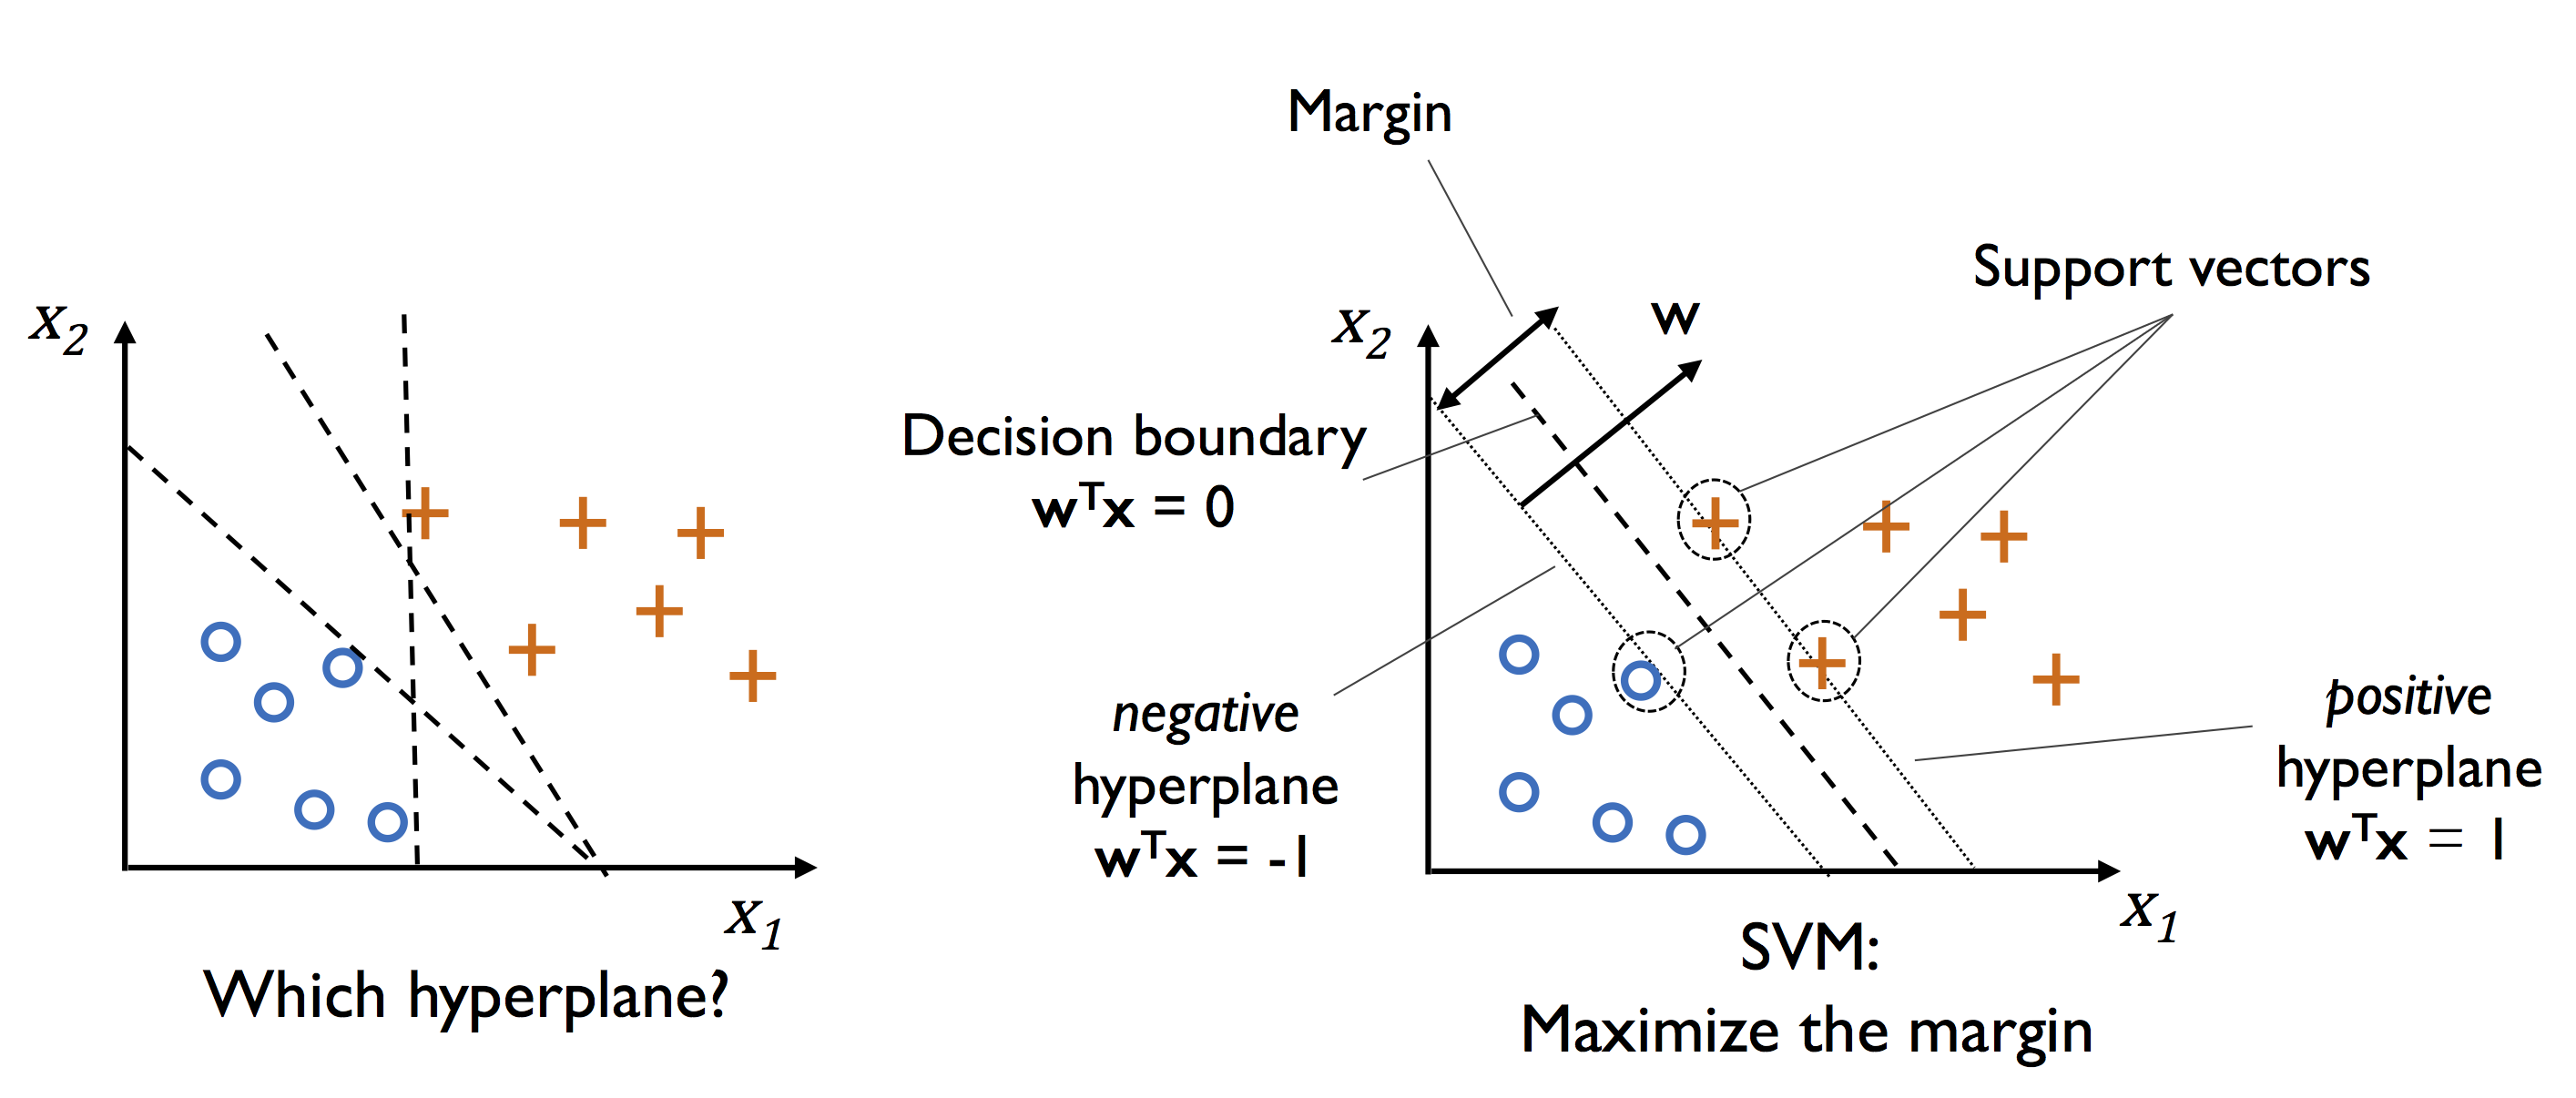

In [19]:
Image(filename='images/03_09.png', width=700) 

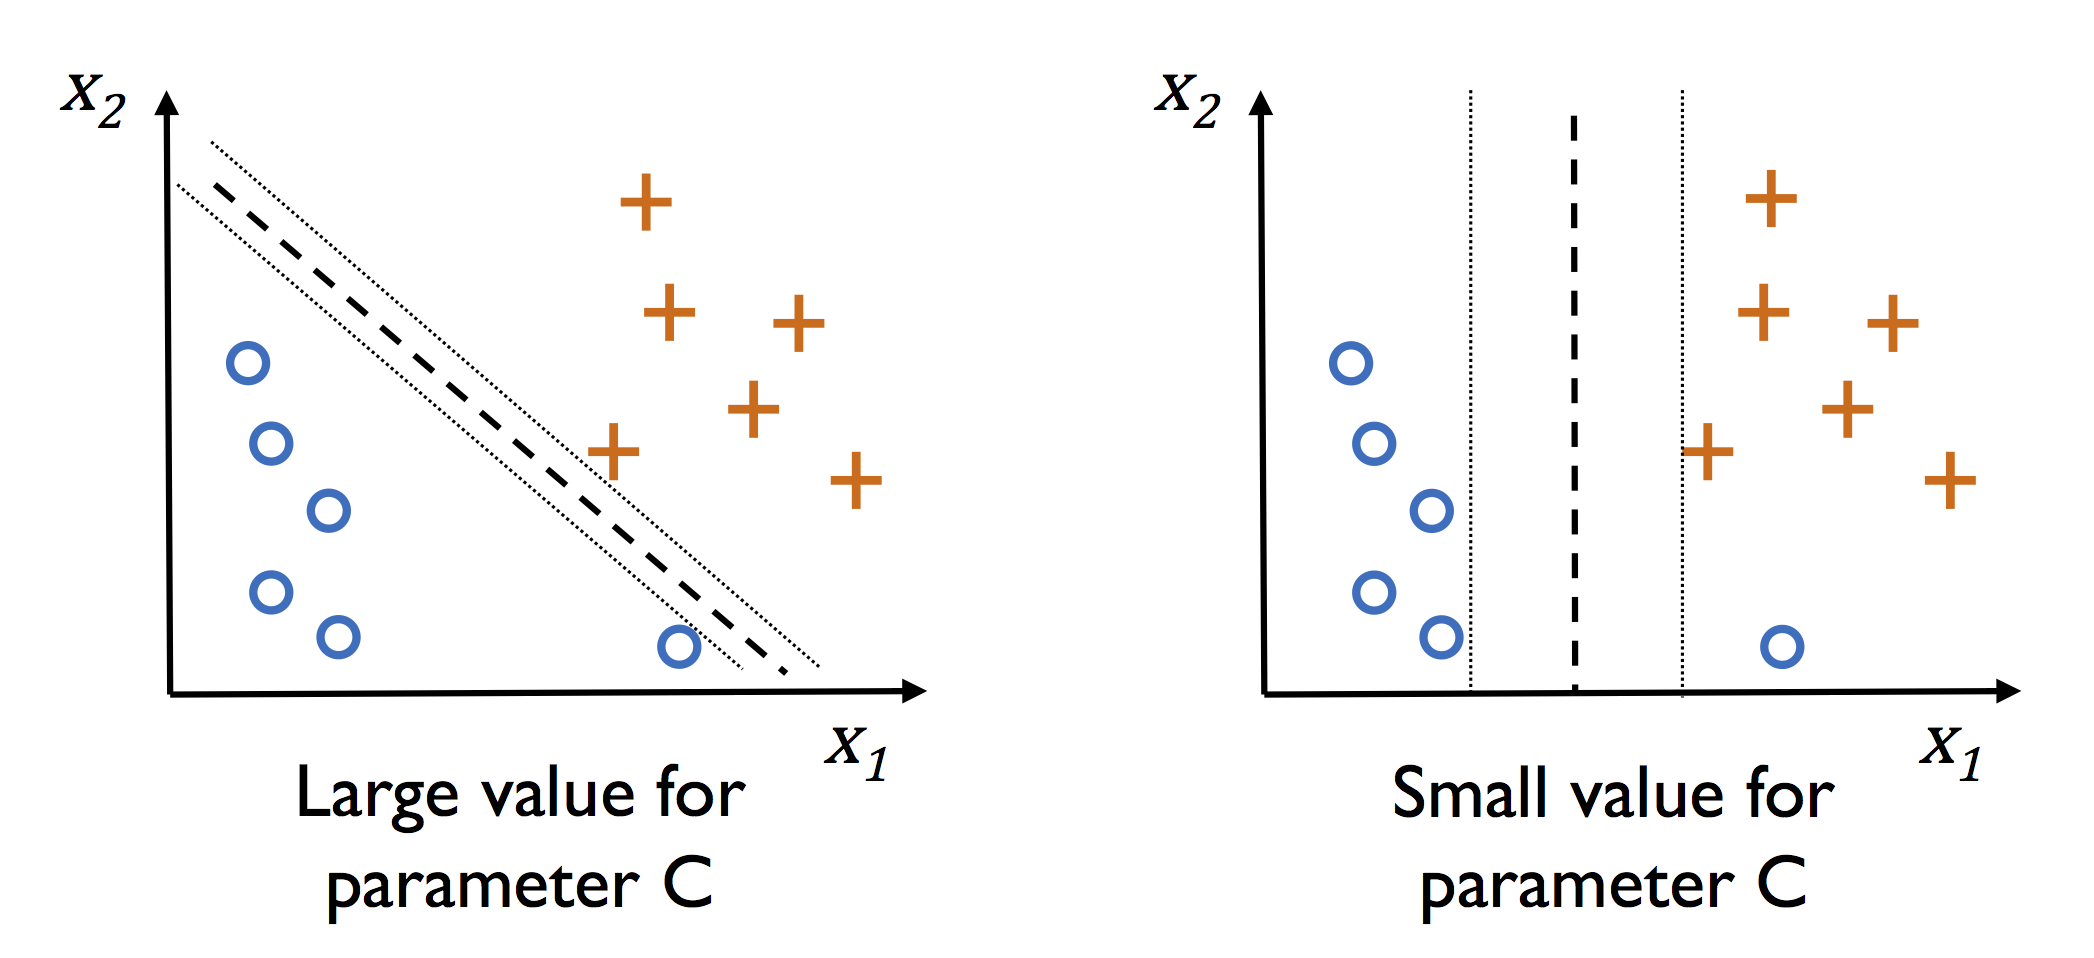

In [20]:
Image(filename='images/03_10.png', width=600) 

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


print("train accuracy",svm.score(X_train_std,y_train))
print("test accuracy",svm.score(X_test_std,y_test))
#plot_decision_regions(X_combined_std, 
#                      y_combined,
#                      classifier=svm, 
#                      test_idx=range(105, 150))
#plt.xlabel('petal length [standardized]')
#plt.ylabel('petal width [standardized]')
#plt.legend(loc='upper left')
#plt.tight_layout()
#plt.savefig('images/SVC.png', dpi=300)
#plt.show()

train accuracy 0.952380952381
test accuracy 0.977777777778


<br>
<br>

## kernel SVM를 이용한 비선형 분류

In [29]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)


#Image(filename='images/xor.png', width=700) 

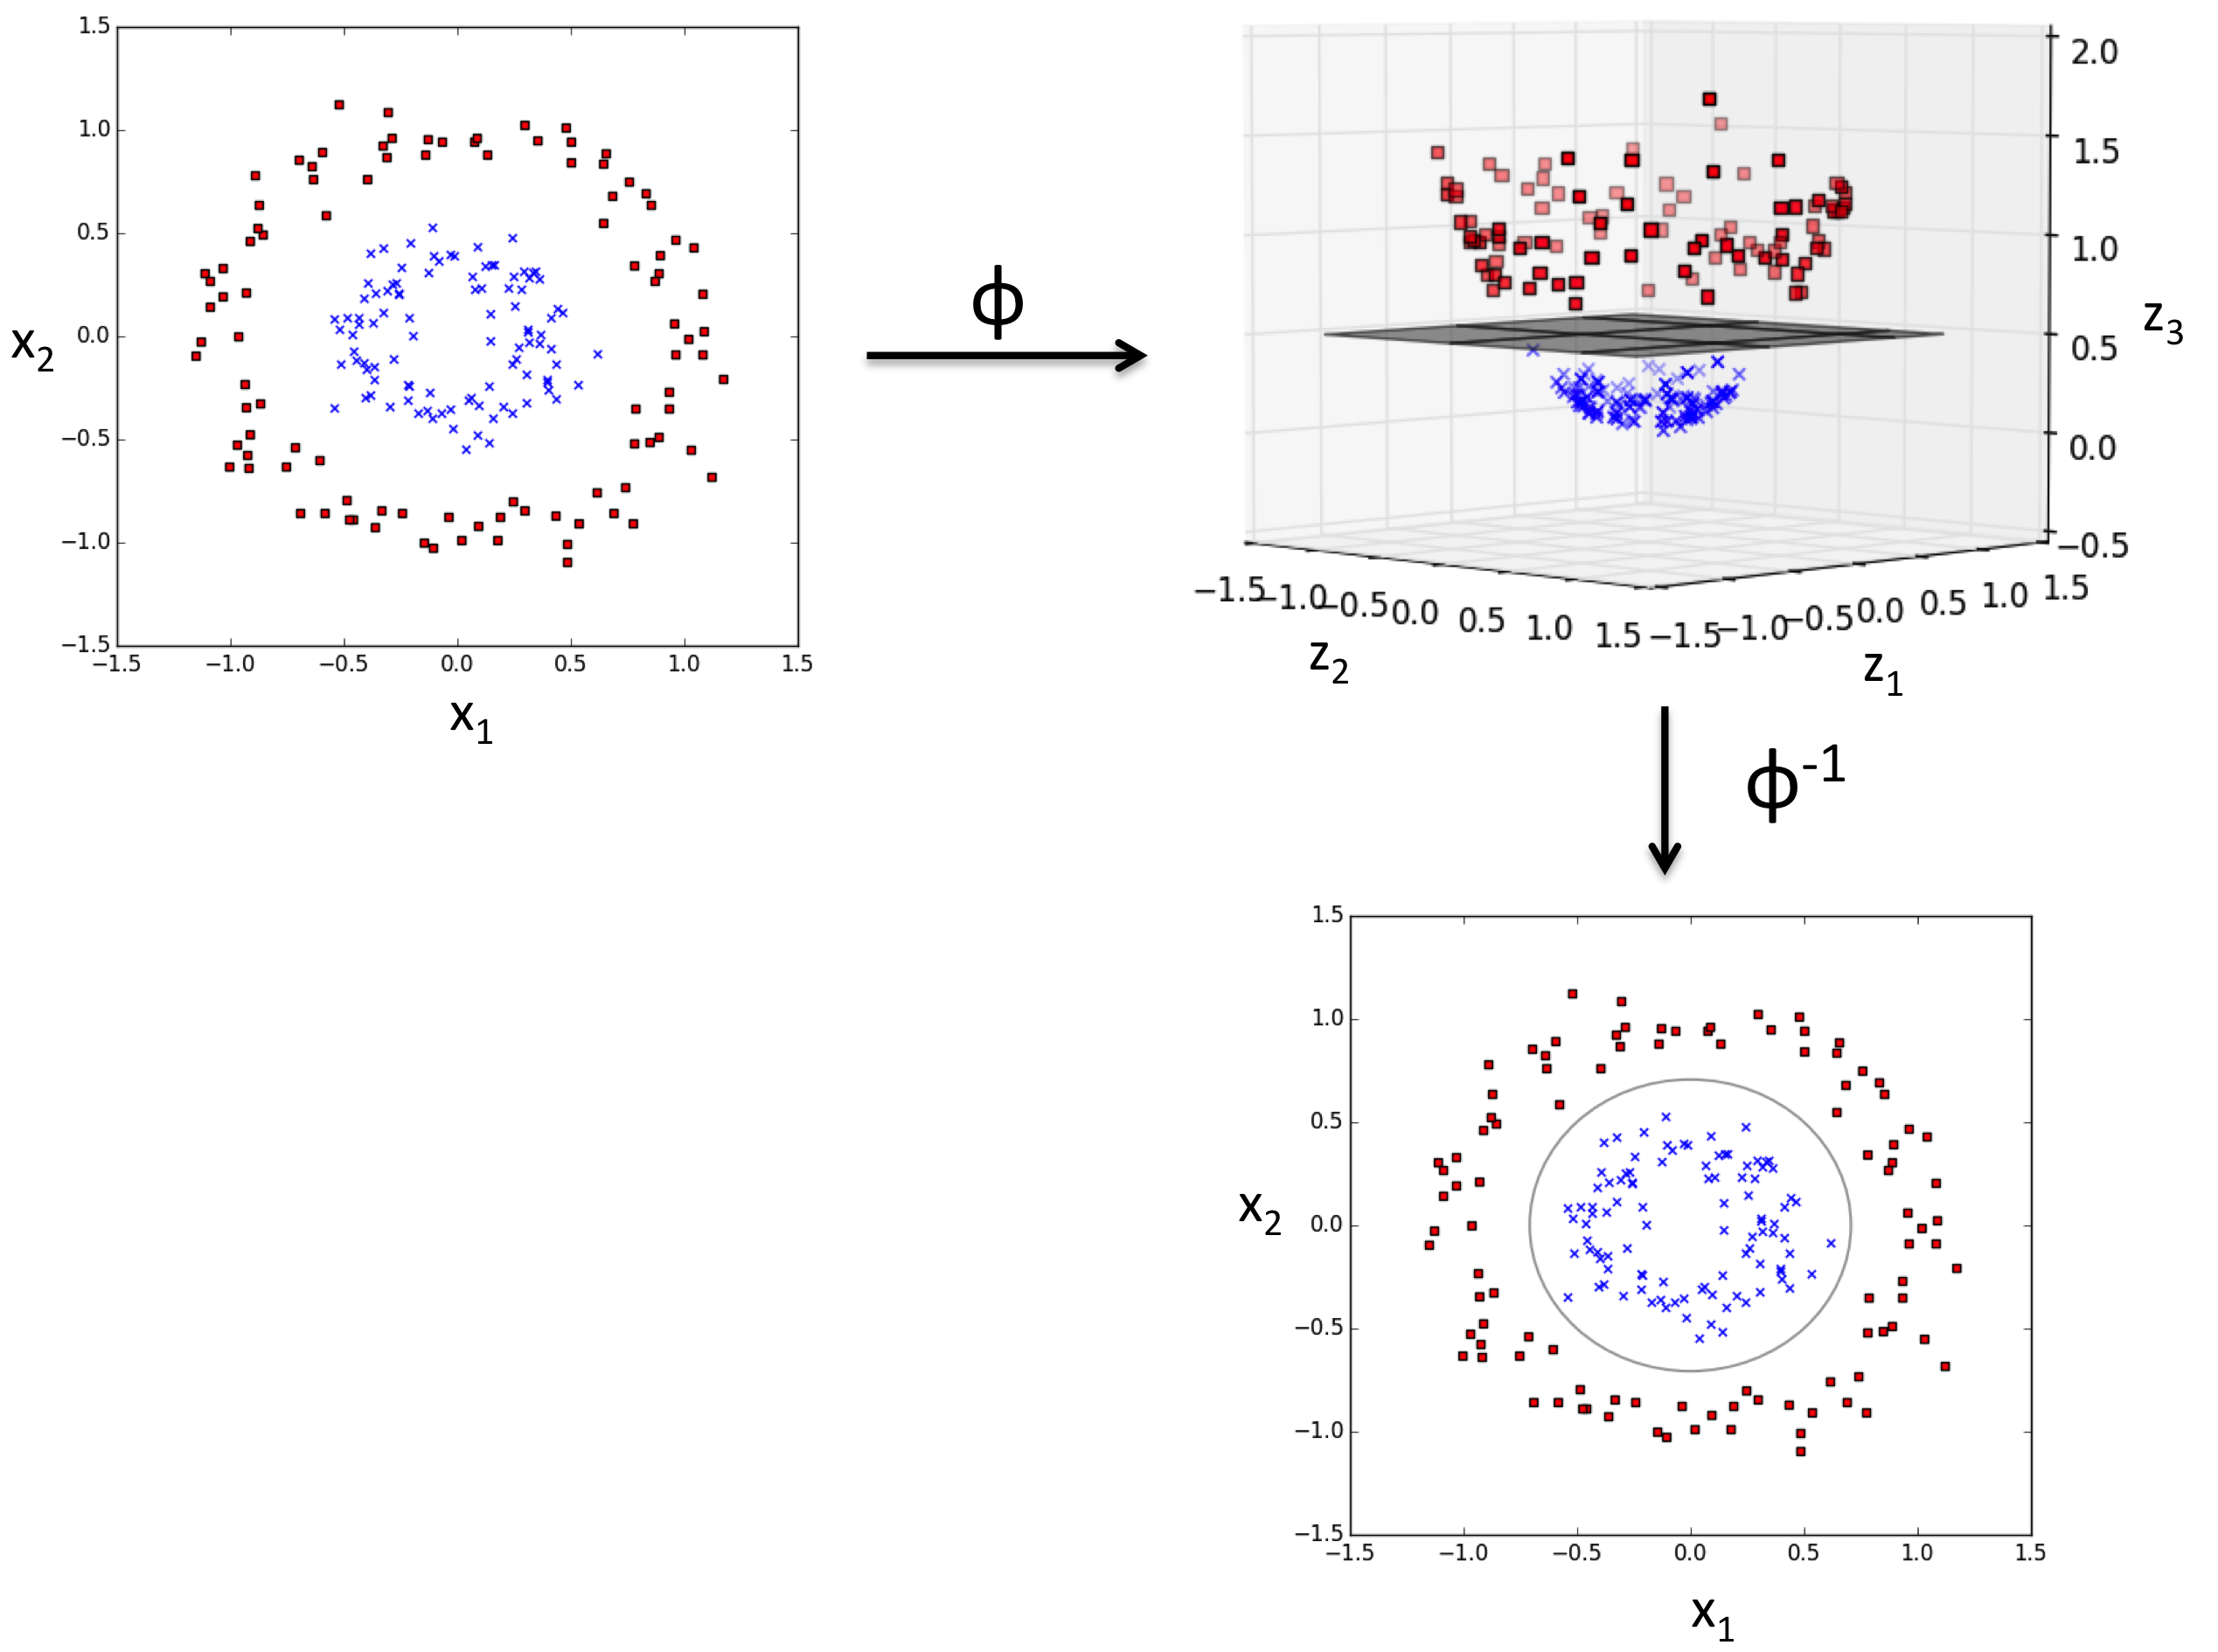

In [23]:
Image(filename='images/03_13.png', width=700) 

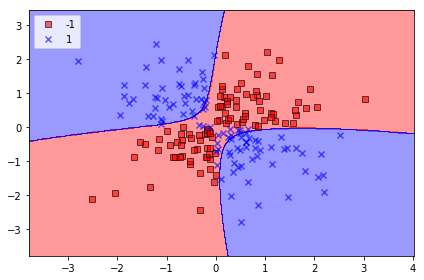

In [30]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/xor_classified.png', dpi=300)
plt.show()

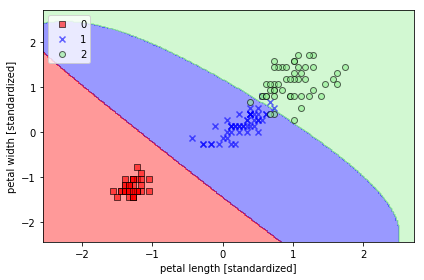

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/rbf.png', dpi=300)
plt.show()

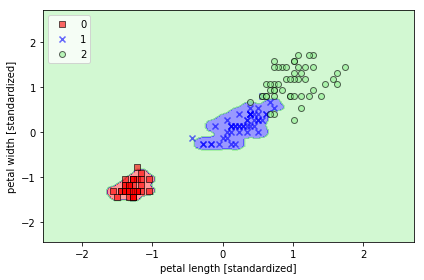

In [22]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/gamma.png', dpi=300)
plt.show()

<br>

## Multiclass classifier

### One versus One classification

In [34]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0))
ovo_clf.fit(X_train_std, y_train)
#ovo_clf.predict(X_test_std)
print("training accuracy: ",ovo_clf.score(X_train_std,y_train))
print("test accuracy: ",ovo_clf.score(X_test_std,y_test))

training accuracy:  0.952380952381
test accuracy:  0.977777777778


In [35]:
ovo_clf1 = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0, decision_function_shape='ovo')
ovo_clf1.fit(X_train_std, y_train)
#ovo_clf1.predict(X_test_std)
print("training accuracy: ",ovo_clf1.score(X_train_std,y_train))
print("test accuracy: ",ovo_clf1.score(X_test_std,y_test))

training accuracy:  0.952380952381
test accuracy:  0.977777777778


### One versus Rest Classification

In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(C=100.0, random_state=1))
ovr_clf.fit(X_train_std, y_train)
#ovr_clf.predict(X_test_std)
print("training accuracy: ",ovr_clf.score(X_train_std,y_train))
print("test accuracy: ",ovr_clf.score(X_test_std,y_test))

training accuracy:  0.952380952381
test accuracy:  0.977777777778


In [38]:
ovr_clf1 = LogisticRegression(C=100.0, random_state=1, multi_class='ovr') # defualt
ovr_clf1.fit(X_train_std, y_train)
ovr_clf1.predict(X_test_std)
print("training accuracy: ",ovr_clf1.score(X_train_std,y_train))
print("test accuracy: ",ovr_clf1.score(X_test_std,y_test))

training accuracy:  0.952380952381
test accuracy:  0.977777777778


<br>
<br>

## KNN(K-nearest neighbors)

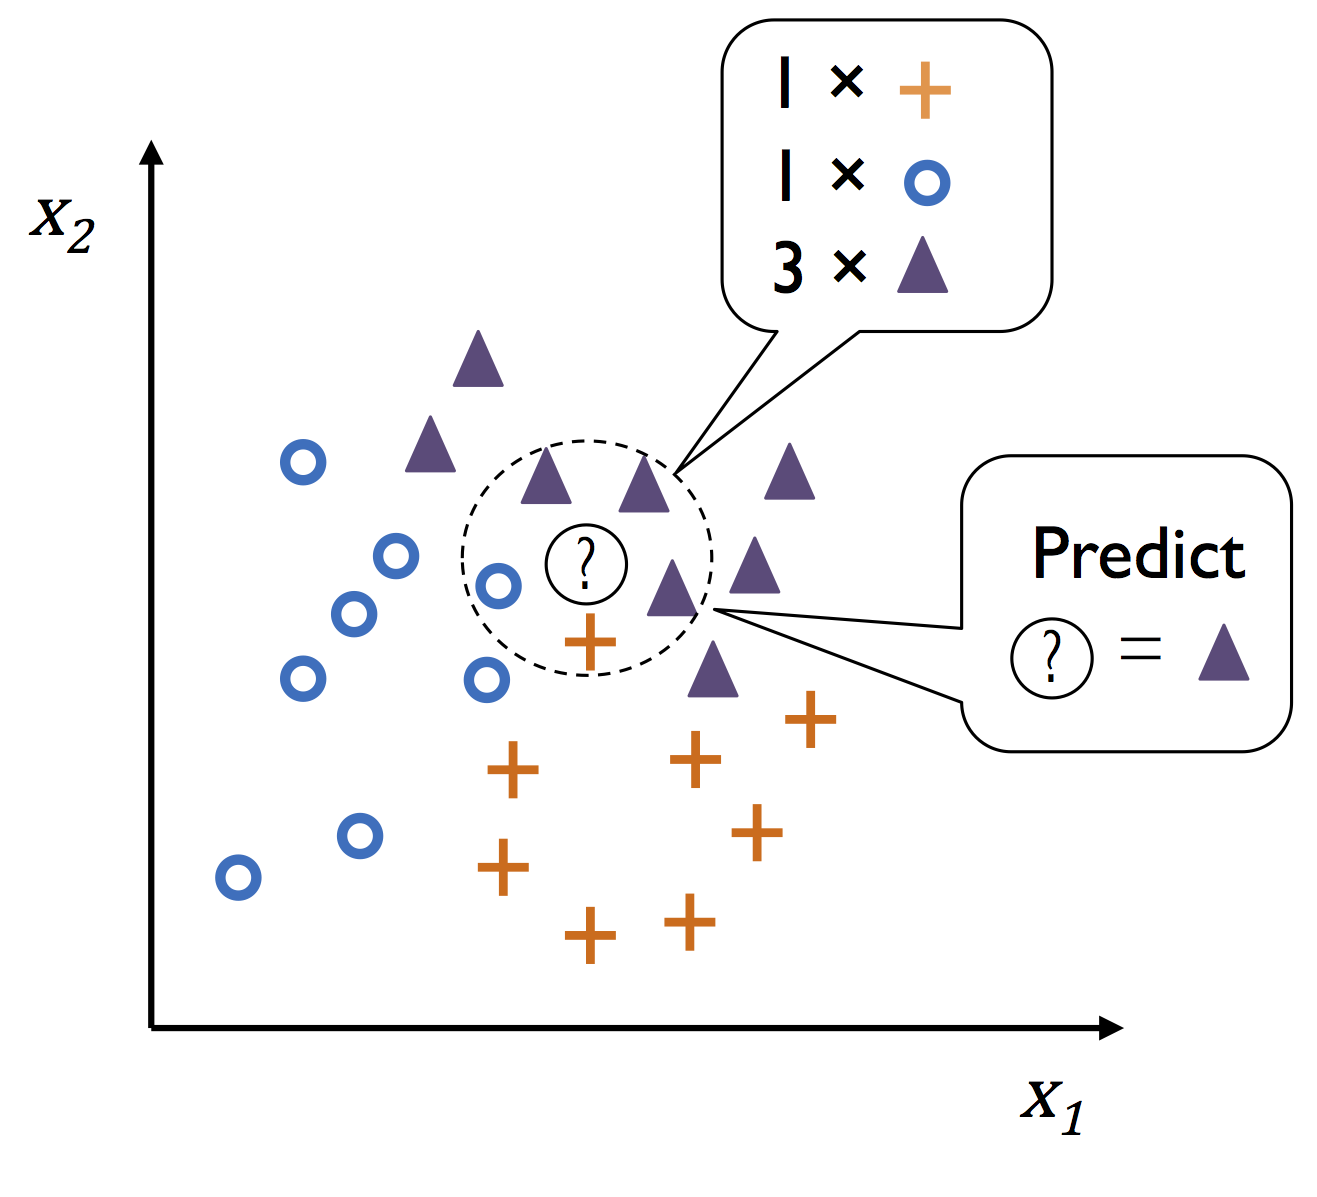

In [37]:
Image(filename='images/03_23.png', width=400) 

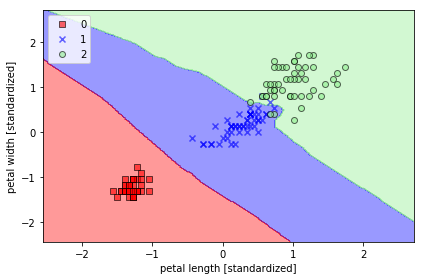

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/knn.png', dpi=300)
plt.show()

<br>

## Multilabel classsification

In [40]:
y_train_0=(y_train==0)
y_train_2=(y_train==2)
y_multilabel=np.c_[y_train_0, y_train_2]

In [41]:
knn.fit(X_train_std, y_multilabel)
knn.predict(X_test_std[0:10])

array([[False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False,  True],
       [ True, False]], dtype=bool)

## Multioutput classification

In [45]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [46]:
mnist_X,mnist_y = mnist['data'], mnist['target']

In [47]:
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = mnist_X[:60000], mnist_X[60000:], mnist_y[:60000], mnist_y[60000:]

In [48]:
noise = np.random.randint(0,100, (len(mnist_X_train), 784))
X_train_mod = mnist_X_train + noise
noise = np.random.randint(0,100, (len(mnist_X_test), 784))
X_test_mod = mnist_X_test + noise
y_train_mod = mnist_X_train # noise 없음
y_test_mod = mnist_X_test # noise 없음

In [49]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

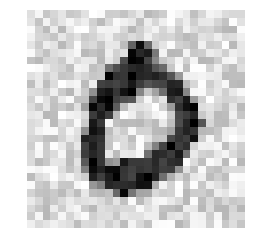

In [50]:
plot_digit(X_test_mod[0])
plt.show()

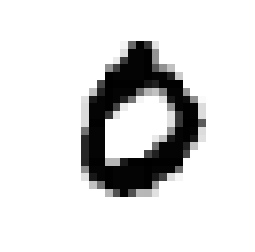

In [51]:
plot_digit(y_test_mod[0])
plt.show()

In [ ]:
print(X_train_mod.shape)
print(y_train_mod.shape)
knn.fit(X_train_mod, y_train_mod)
clean_digit = knn.predict([X_test_mod[0]])
plot_digit(clean_digit)

In [ ]:
#knn.fit(X_train_mod,mnist_y_train)
#print("train accuracy: ",knn.score(X_train_mod,mnist_y_train))
#print("test accuracy: ",knn.score(X_test_mod,mnist_y_test))